In [1]:
# 03_event_correlation_analysis.ipynb

# --- 1. Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

In [5]:
# --- 2. Load Your Data ---
# Sample: Brent oil data with detected changepoints
df = pd.read_csv("../data/brent_log_returns.csv", parse_dates=["Date"])
# Example format: df.columns = ['Date', 'Price', 'Log_Returns']

# Optional: load detected changepoints (if any are available)
try:
    with open("changepoints.json", "r") as f:
        changepoints = json.load(f)
    changepoints = [pd.to_datetime(c) for c in changepoints]
except:
    # Use mock changepoints if file isn't available
    changepoints = pd.to_datetime([
        "2008-09-15",  # Lehman Brothers collapse
        "2020-03-09",  # COVID oil crash
        "2022-02-24",  # Russia-Ukraine war starts
    ])

In [6]:
# --- 3. Load Event Timeline (Manually Curated or External Dataset) ---
event_data = pd.DataFrame({
    "Event": [
        "2008 Financial Crisis",
        "COVID-19 Pandemic Begins",
        "Russia Invades Ukraine"
    ],
    "Date": pd.to_datetime(["2008-09-15", "2020-03-11", "2022-02-24"])
})

In [7]:
# --- 4. Merge and Compare ---
df["Is_Changepoint"] = df["Date"].isin(changepoints)
event_data["Is_Changepoint"] = event_data["Date"].isin(changepoints)

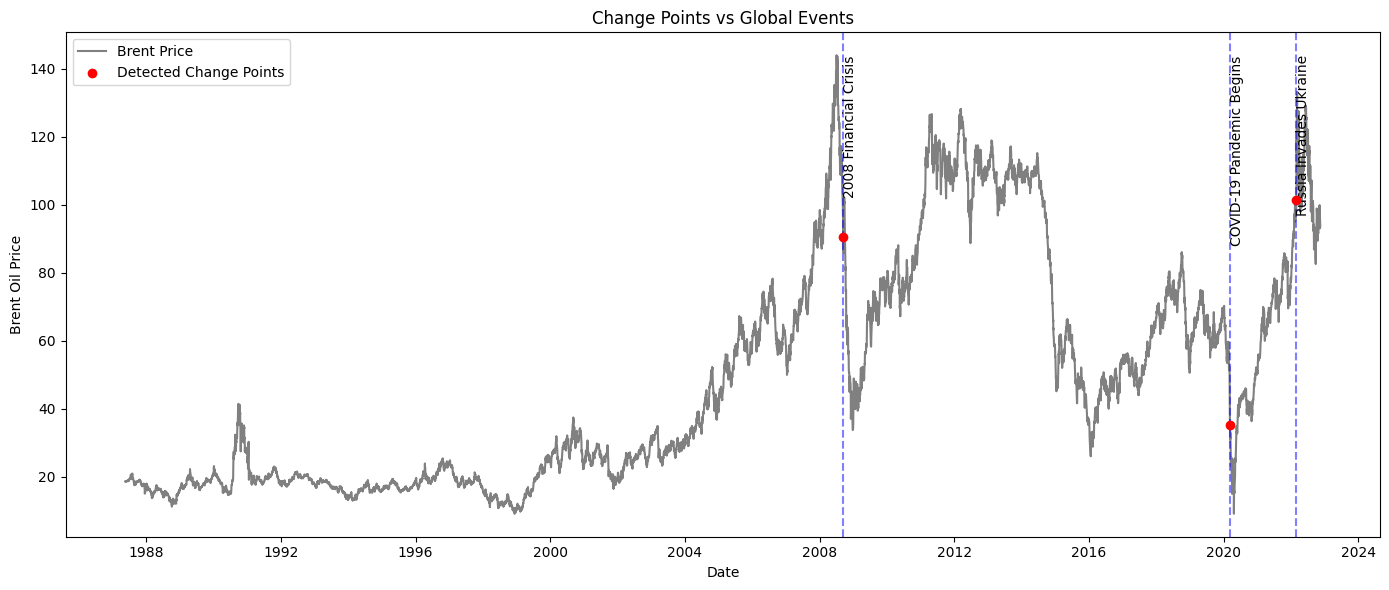

In [8]:
# --- 5. Visualization ---
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Price"], label="Brent Price", color="gray")
plt.scatter(df[df["Is_Changepoint"]]["Date"], df[df["Is_Changepoint"]]["Price"],
            color="red", label="Detected Change Points", zorder=5)
for _, row in event_data.iterrows():
    plt.axvline(x=row["Date"], color="blue", linestyle="--", alpha=0.5)
    plt.text(row["Date"], df["Price"].max(), row["Event"], rotation=90, verticalalignment='top')

plt.title("Change Points vs Global Events")
plt.xlabel("Date")
plt.ylabel("Brent Oil Price")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# --- 6. Event Correlation Summary ---
event_matches = event_data[event_data["Is_Changepoint"] == True]
print("🟢 Events that match changepoints:")
print(event_matches[["Date", "Event"]])

🟢 Events that match changepoints:
        Date                   Event
0 2008-09-15   2008 Financial Crisis
2 2022-02-24  Russia Invades Ukraine
